<a href="https://colab.research.google.com/github/SaKi1309/VoloGAN/blob/master/VoloGAN_Drawings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 432x288 with 0 Axes>

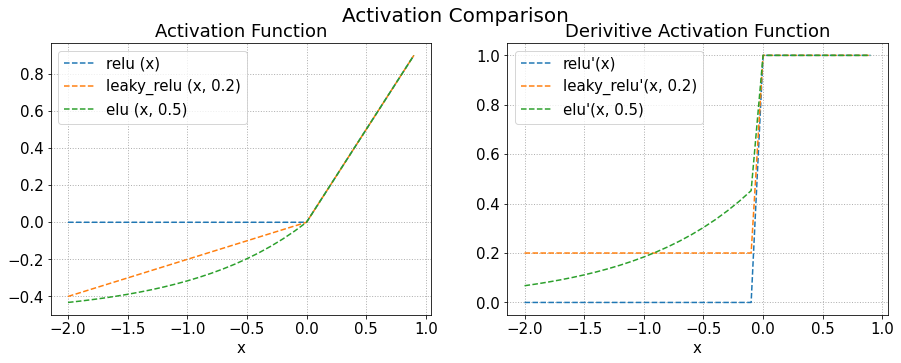

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(-2,1,0.1)   # start,stop,step
relu = np.where(x > 0, x, 0)
leakyRelu = np.where(x > 0, x, 0.2*x)
elu = np.where(x > 0, x, 0.5* (np.exp(x)-1))

d_relu = np.where(x > 0, 1, 0)
d_leakyRelu = np.where(x > 0, 1, 0.2)
d_elu = np.where(x > 0, 1, elu + 0.5)

fig = plt.figure()
fig = plt.figure(figsize=[15,5])
fig.suptitle("Activation Comparison", fontsize=20)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Activation Function')
ax1.plot(x,relu,label="relu (x)",linestyle="--")
ax1.plot(x,leakyRelu,label="leaky_relu (x, 0.2)",linestyle="--")
ax1.plot(x,elu,label="elu (x, 0.5)",linestyle="--")
ax1.set_xlabel("x")
ax1.legend(loc="upper left")
ax1.grid(linestyle=':', linewidth=1,)
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Derivitive Activation Function')
ax2.plot(x,d_relu,label="relu'(x)",linestyle="--")
ax2.plot(x,d_leakyRelu,label="leaky_relu'(x, 0.2)",linestyle="--")
ax2.plot(x,d_elu,label="elu'(x, 0.5)",linestyle="--")
ax2.set_xlabel("x")
ax2.legend(loc="upper left")
ax2.grid(linestyle=':', linewidth=1)

plt.show()

<Figure size 432x288 with 0 Axes>

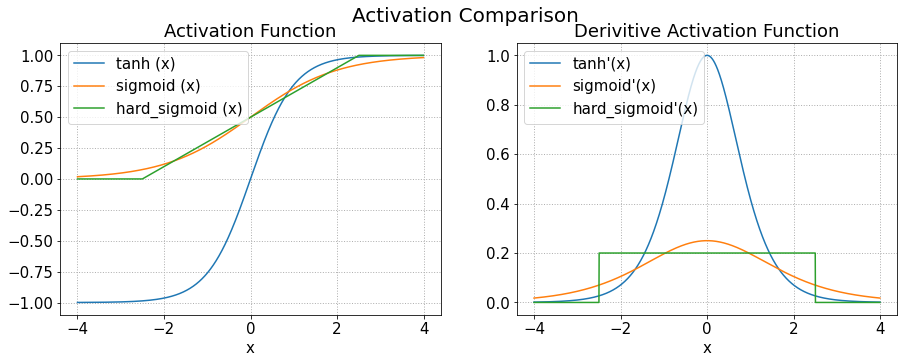

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(-4,4,0.005)   # start,stop,step
tanh = np.tanh(x)
sigmoid = 1/(1 + np.exp(-x))
hard_sigmoid = np.where(x < (-2.5),0,np.where(x > 2.5 , 1, 0.2 * x + 0.5))

d_tanh = 1 - np.tanh(x)**2
d_sigmoid = sigmoid * (1-sigmoid)
d_hard_sigmoid = np.where(x < (-2.5),0,np.where(x > 2.5 , 0, 0.2 ))

fig = plt.figure()
fig = plt.figure(figsize=[15,5])
fig.suptitle("Activation Comparison", fontsize=20)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Activation Function')
ax1.plot(x,tanh,label="tanh (x)",linestyle="-")
ax1.plot(x,sigmoid,label="sigmoid (x)",linestyle="-")
ax1.plot(x,hard_sigmoid,label="hard_sigmoid (x)",linestyle="-")
ax1.set_xlabel("x")
ax1.legend(loc="upper left")
ax1.grid(linestyle=':', linewidth=1,)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Derivitive Activation Function')
ax2.plot(x,d_tanh,label="tanh'(x)",linestyle="-")
ax2.plot(x,d_sigmoid,label="sigmoid'(x)",linestyle="-")
ax2.plot(x,d_hard_sigmoid,label="hard_sigmoid'(x)",linestyle="-")
ax2.set_xlabel("x")
ax2.legend(loc="upper left")
ax2.grid(linestyle=':', linewidth=1)

plt.show()

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 512, 512, 4)]     0         
_________________________________________________________________
Layer1 (Conv2D)              (None, 510, 510, 4)       144       
_________________________________________________________________
Layer2 (Conv2D)              (None, 254, 254, 8)       288       
_________________________________________________________________
Layer3 (Conv2D)              (None, 252, 252, 8)       576       
_________________________________________________________________
Layer4 (Conv2D)              (None, 125, 125, 16)      1152      
_________________________________________________________________
Layer5 (Conv2D)              (None, 123, 123, 16)      2304      
_________________________________________________________________
Layer6 (Conv2D)              (None, 61, 61, 32)        460

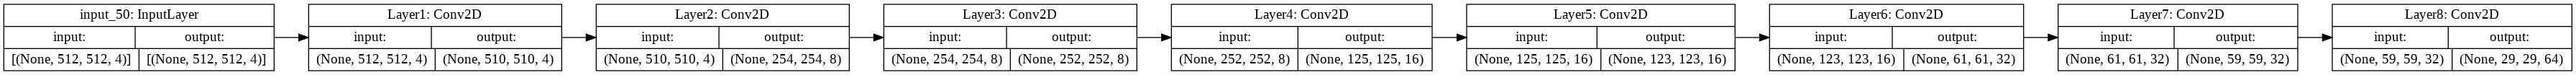

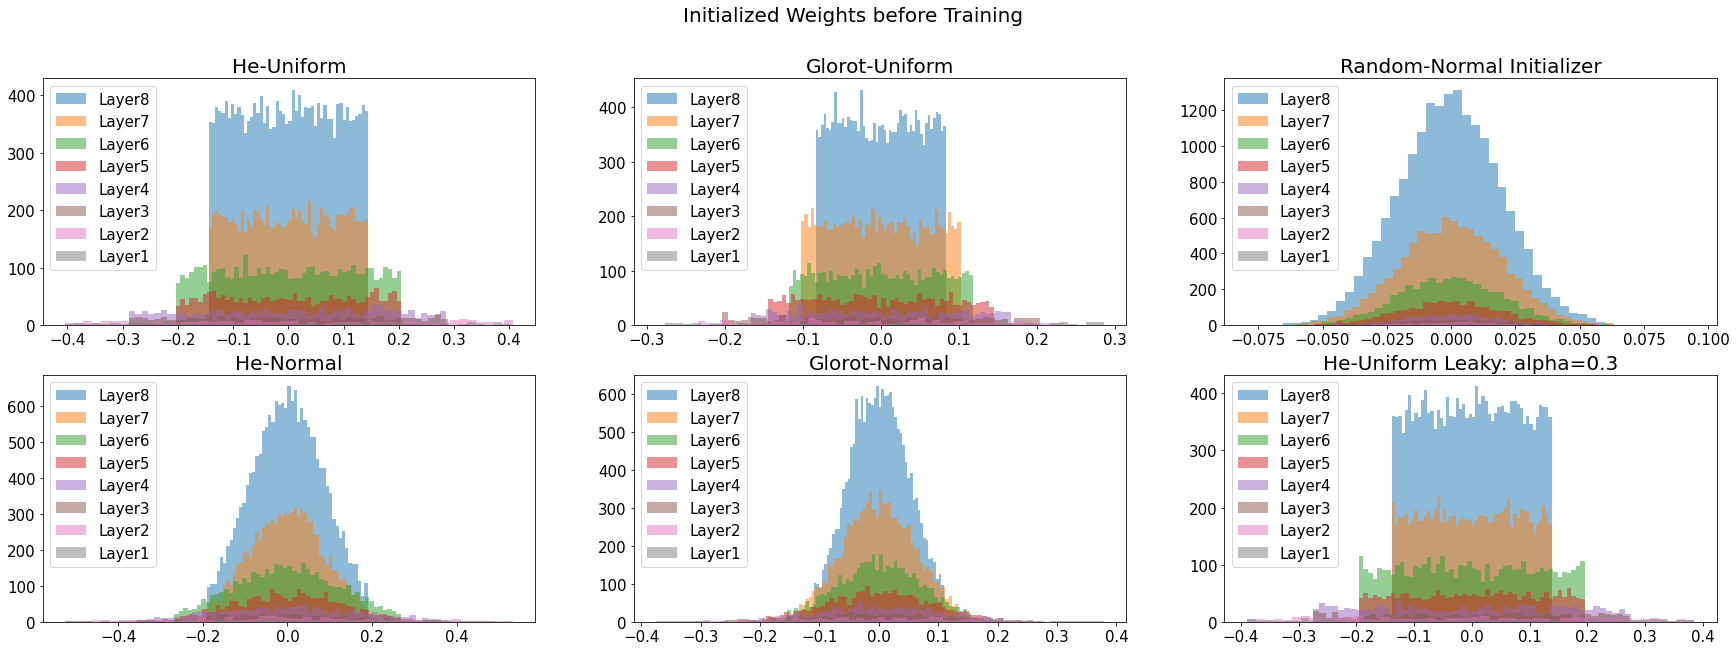

In [8]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def _compute_fans(shape):
  """Computes the number of input and output units for a weight shape.
  Args:
    shape: Integer shape tuple or TF tensor shape.
  Returns:
    A tuple of integer scalars (fan_in, fan_out).
  """
  if len(shape) < 1:  # Just to avoid errors for constants.
    fan_in = fan_out = 1
  elif len(shape) == 1:
    fan_in = fan_out = shape[0]
  elif len(shape) == 2:
    fan_in = shape[0]
    fan_out = shape[1]
  else:
    # Assuming convolution kernels (2D, 3D, or more).
    # kernel shape: (..., input_depth, depth)
    receptive_field_size = 1
    for dim in shape[:-2]:
      receptive_field_size *= dim
    fan_in = shape[-2] * receptive_field_size
    fan_out = shape[-1] * receptive_field_size
  return int(fan_in), int(fan_out)

class HeUniformLeakyRelu(tf.keras.initializers.Initializer):
  def __init__(self,alpha = 0.3, seed = None):
    self.alpha = alpha
    self.seed = seed    

  def __call__(self, shape, dtype=None, **kwargs):
    fan_in, _ = _compute_fans(shape)
    limit = np.sqrt(6/((1+self.alpha**2)*fan_in))
    return tf.random.uniform( shape,-limit,limit, dtype=dtype,seed = self.seed)

  def get_config(self):  # To support serialization
    return {"alpha": self.alpha, "seed":self.seed}

class HeNormalLeakyRelu(tf.keras.initializers.Initializer):
  def __init__(self, alpha = 0.3, seed = None):
    self.alpha = alpha
    self.seed = seed 

  def __call__(self, shape, dtype=None, **kwargs):
    fan_in, _ = _compute_fans(shape)
    std = np.sqrt(2)/np.sqrt((1+self.alpha**2)*fan_in)
    return tf.random.truncated_normal(shape, mean=0, stddev=std, dtype=dtype,seed = self.seed)

  def get_config(self):  # To support serialization
    return {"alpha": self.alpha, "seed":self.seed}

plt.rcParams.update({'font.size': 15})
def testmodel(initializer):
  input = tf.keras.layers.Input(shape=(512,512,4))

  x = tf.keras.layers.Conv2D(
      filters = 4, kernel_size = (3, 3), kernel_initializer = initializer,
      use_bias = False,name="Layer1")(input)
  x = tf.keras.layers.Conv2D(
      filters = 8, kernel_size = (3, 3), strides=(2,2), kernel_initializer = initializer, 
      use_bias = False,name="Layer2")(x)

  x = tf.keras.layers.Conv2D(
      filters = 8, kernel_size = (3, 3), kernel_initializer = initializer,
      use_bias = False,name="Layer3")(x)
  x = tf.keras.layers.Conv2D(
      filters = 16, kernel_size = (3, 3), strides=(2,2), kernel_initializer = initializer, 
      use_bias = False,name="Layer4")(x)

  x = tf.keras.layers.Conv2D(
      filters = 16, kernel_size = (3, 3), kernel_initializer = initializer,
      use_bias = False,name="Layer5")(x)
  x = tf.keras.layers.Conv2D(
      filters = 32, kernel_size = (3, 3), strides=(2,2), kernel_initializer = initializer, 
      use_bias = False,name="Layer6")(x)

  x = tf.keras.layers.Conv2D(
      filters = 32, kernel_size = (3, 3), kernel_initializer = initializer,
      use_bias = False,name="Layer7")(x)
  x = tf.keras.layers.Conv2D(
      filters = 64, kernel_size = (3, 3), strides=(2,2), kernel_initializer = initializer, 
      use_bias = False,name="Layer8")(x)

  return tf.keras.Model(inputs=input,outputs=x)


model = testmodel(tf.keras.initializers.HeUniform())
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=False, show_dtype=True)

alpha = 0.3
initializer = {
    "He-Uniform Initializer":tf.keras.initializers.HeUniform(),
    "Glorot-Uniform Initializer":tf.keras.initializers.GlorotUniform(),
    "Random-Normal Initializer":tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
    "He-Normal Initializer":tf.keras.initializers.HeNormal(),
    "Glorot-Normal Initializer":tf.keras.initializers.GlorotNormal(),
    "He-Uniform Leaky": HeUniformLeakyRelu(alpha)

}
models = [
          testmodel(initializer["He-Uniform Initializer"]),
          testmodel(initializer["Glorot-Uniform Initializer"]),
          testmodel(initializer["Random-Normal Initializer"]),
          testmodel(initializer["He-Normal Initializer"]),
          testmodel(initializer["Glorot-Normal Initializer"]),
          testmodel(initializer["He-Uniform Leaky"])

]

title = [
         "He-Uniform",
         "Glorot-Uniform" ,
         "Random-Normal Initializer",
         "He-Normal",
         "Glorot-Normal",
         "He-Uniform Leaky: alpha={}".format(alpha)]

fig = plt.figure(figsize=[30,10])
fig.suptitle("Initialized Weights before Training", fontsize=20)

for m, model in enumerate(models):
  ax = fig.add_subplot(2, 3, m+1)
  ax.set_title(title[m], fontsize=20)
  for i, layer in enumerate(reversed(model.layers)): #reversed for pretier colors!
    if "Layer" in layer.name:
      ax.hist(np.ravel(layer.get_weights()),50,label="{}".format(layer.name), alpha=0.5)
  ax.legend(loc="upper left",ncol=1)
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=False, show_dtype=False, rankdir='LR')


<Figure size 432x288 with 0 Axes>

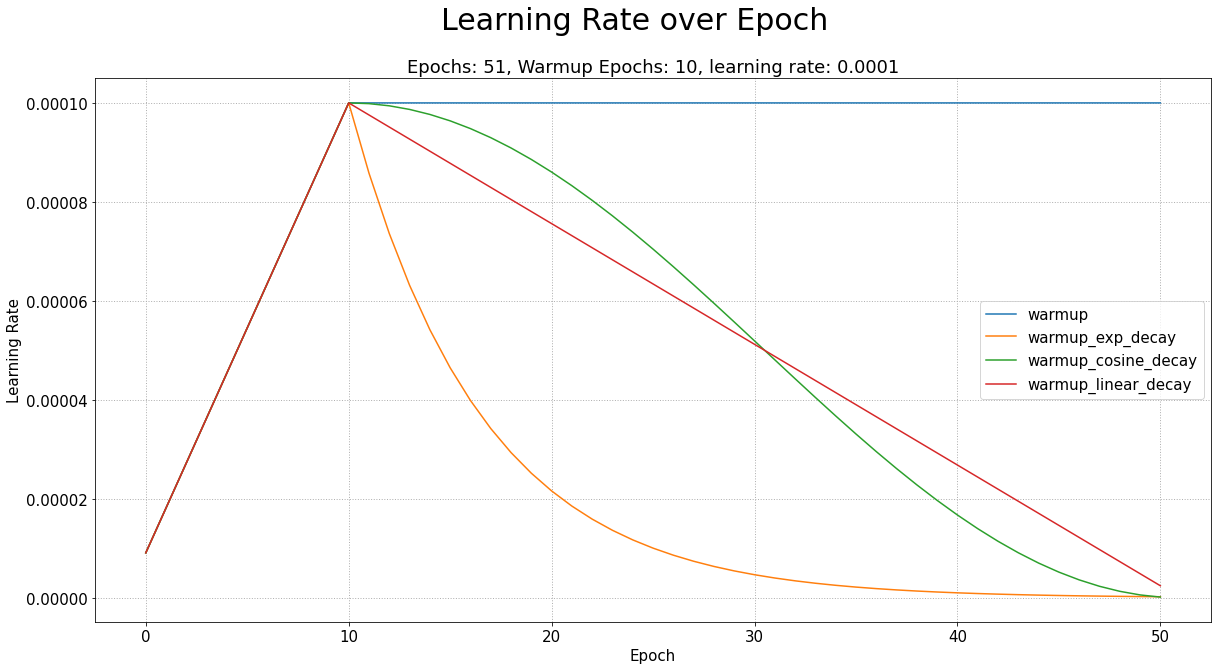

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

epochs = 51
lr_setting = 1e-4
warmup_epochs = 10
epoch = np.arange(0,epochs,1)   # start,stop,step
k = 2*np.pi/(epochs-warmup_epochs)
warmup = np.where(
    epoch < warmup_epochs, 
    (epoch+1)*(lr_setting/(warmup_epochs+1)), 
    lr_setting)
warmup_exp_decay = np.where(
    epoch < warmup_epochs, 
    (epoch+1)*(lr_setting/(warmup_epochs+1)), 
    lr_setting * np.exp(-k*(epoch+1-(warmup_epochs+1))))
warmup_cosine_decay = np.where(
    epoch < warmup_epochs, 
    (epoch+1)*(lr_setting/(warmup_epochs+1)), 
    (lr_setting/2) * np.cos((np.pi/(epochs-warmup_epochs))*(epoch-warmup_epochs))+(lr_setting/2))
warmup_linear_decay = np.where(
    epoch < warmup_epochs, 
    (epoch+1)*(lr_setting/(warmup_epochs+1)),
     -(epoch-warmup_epochs)*(lr_setting/(epochs-(warmup_epochs)))+lr_setting)

fig = plt.figure()
fig = plt.figure(figsize=[20,10])
fig.suptitle("Learning Rate over Epoch", fontsize=30)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Epochs: {}, Warmup Epochs: {}, learning rate: {}'.format(epochs,warmup_epochs,lr_setting))
ax1.plot(epoch, warmup, label="warmup",linestyle="-")
ax1.plot(epoch, warmup_exp_decay, label="warmup_exp_decay",linestyle="-")
ax1.plot(epoch, warmup_cosine_decay, label="warmup_cosine_decay",linestyle="-")
ax1.plot(epoch, warmup_linear_decay, label="warmup_linear_decay",linestyle="-")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Learning Rate")
ax1.legend(loc="center right")
ax1.grid(linestyle=':', linewidth=1,)

plt.show()